In [1]:
from pathlib import Path

import altair as alt
import pandas as pd
import spacy
import swifter
from cleantext import clean

import datetime

import news_utils.plot as pl

pd.set_option('max_colwidth', 800)

In [2]:
# nlp = spacy.load('en_core_web_lg')

In [3]:
alt.renderers.enable('notebook')

alt.__version__

'2.3.0'

In [4]:
BASE = Path('~/data/ynacc_proc/replicate/lmdata_complete')

In [5]:
dfs = []
for x in ['train.csv', 'val.csv']:
    dfs.append(pd.read_csv(BASE/x))

In [6]:
df = pd.concat(dfs)
del dfs

In [7]:
df['headline'].nunique()

2830

In [8]:
datetime.datetime.utcfromtimestamp(df.sort_values('timestamp').iloc[0]['timestamp'])

datetime.datetime(2014, 8, 29, 13, 5, 38)

In [9]:
datetime.datetime.utcfromtimestamp(df.sort_values('timestamp').iloc[-1]['timestamp'])

datetime.datetime(2016, 5, 6, 3, 28, 32)

In [10]:
data = df[['commentindex', 'sdid']].groupby(['sdid']).agg(['nunique']).reset_index()['commentindex']['nunique'].value_counts()

In [11]:
num_replies_lm = pd.DataFrame(data).reset_index().rename(columns={'index': 'num_replies', 'nunique': 'count'})

In [66]:
data = df[['commentindex', 'sdid']].groupby(['sdid']).agg(['unique'])

### Replies per Thread in all LM Data

In [121]:
for i in range(1, 100):
    num = num_replies_lm[num_replies_lm['num_replies'] == i]
    if len(num) == 0:
        num_replies_lm = num_replies_lm.append({'num_replies': i, 'count': 0}, ignore_index=True)

num_replies_lm.sort_values('num_replies', inplace=True)

sumfrom = 17
num_replies_lm_out = num_replies_lm.head(sumfrom)

# num_replies_lm_out = num_replies_lm_out.append([{"num_replies": str(sumfrom + 1) + '+', 'count': num_replies_lm.iloc[sumfrom:].sum()['count']}])

In [122]:
num_replies_lm_out

,num_replies,count
16,1,2
14,2,68
2,3,4439
4,4,2586
0,5,8680
1,6,5538
3,7,3726
5,8,2440
6,9,1751
7,10,1488


In [123]:
num_replies_lm_out.to_csv('lm_num_replies.csv', index=None)

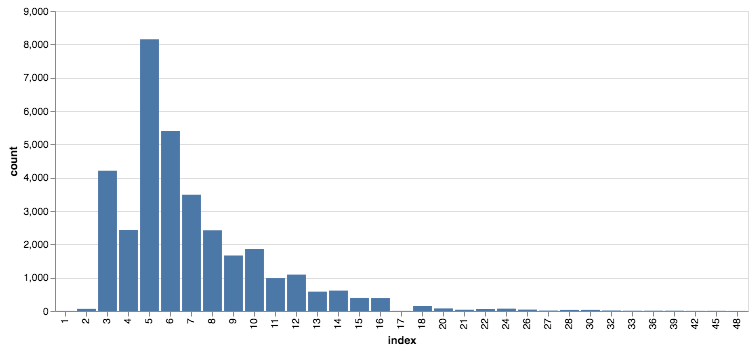

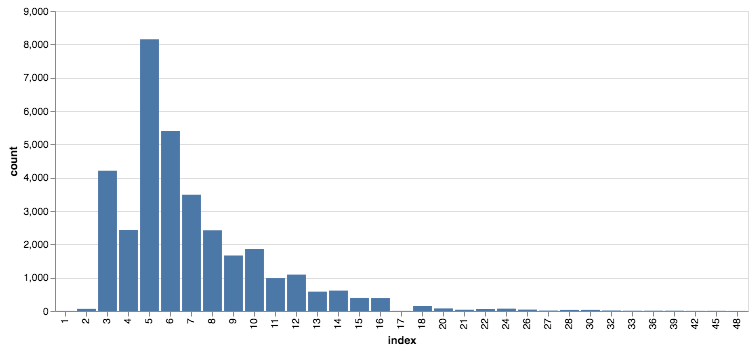

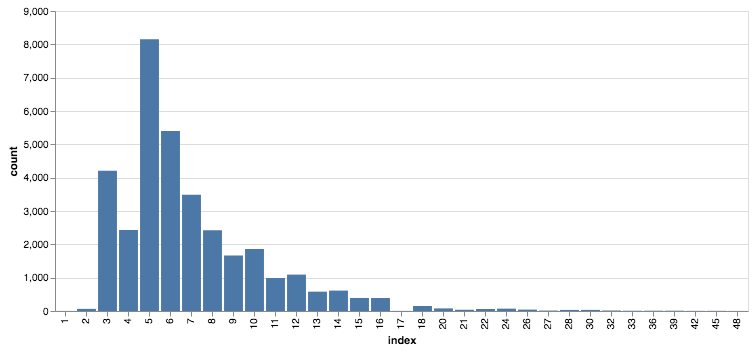

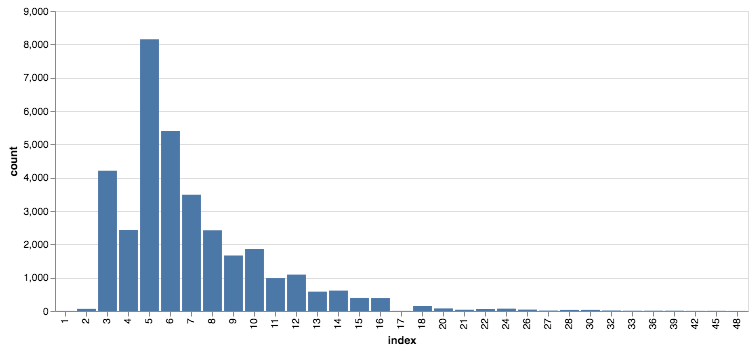

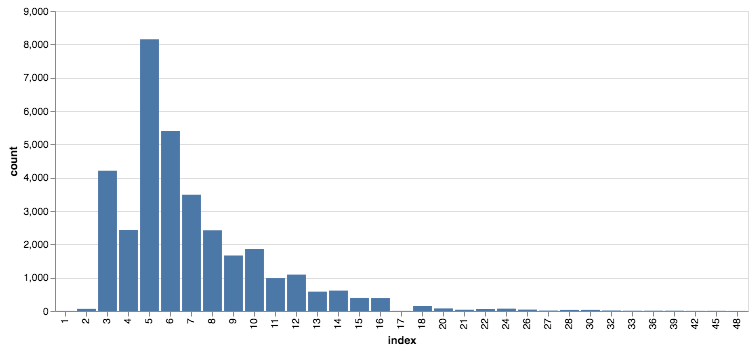

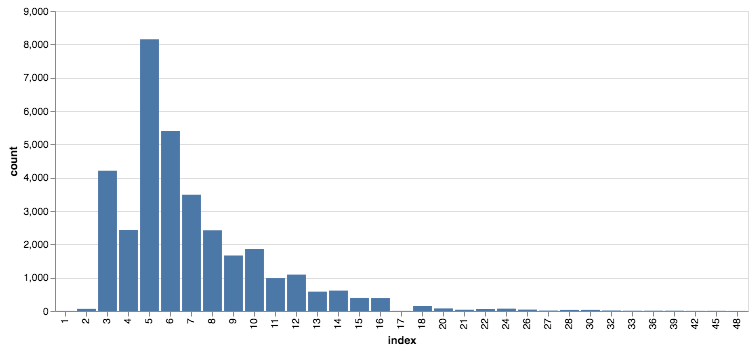

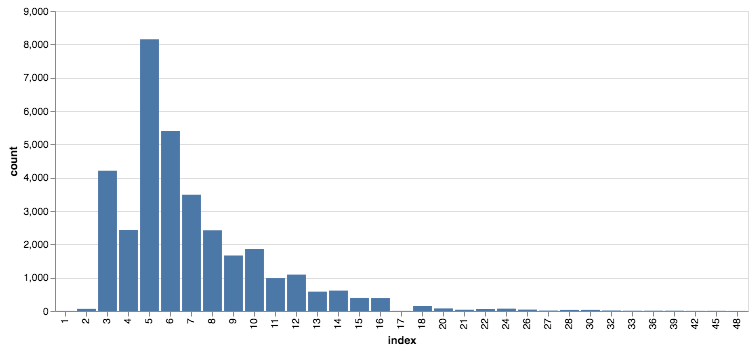

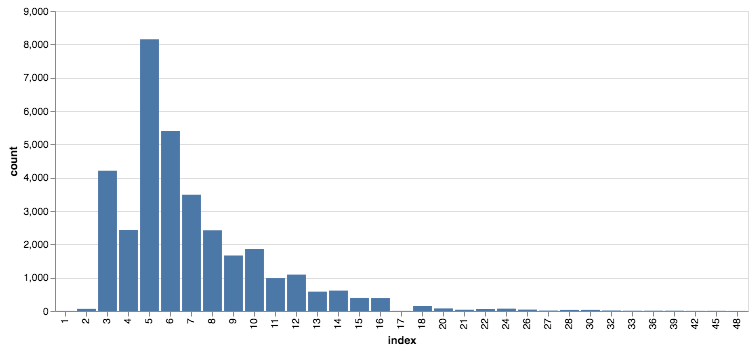

In [11]:
pl.plot_values(df[['commentindex', 'sdid']].groupby(['sdid']).agg(['count']).reset_index()['commentindex'], 'count')

### Replies per Thread in Class Train

In [12]:
df_train = pd.read_csv(Path('~/data/ynacc_proc/replicate/split/train.csv'))

In [165]:
data=  df_train[['commentindex', 'sdid']].groupby(['sdid']).agg(['count']).reset_index()['commentindex']['count'].value_counts()

In [168]:
pd.DataFrame(data).reset_index().rename(columns={'index': 'num_replies'}).sort_values('num_replies').to_csv('cl_num_replies.csv', index=None)

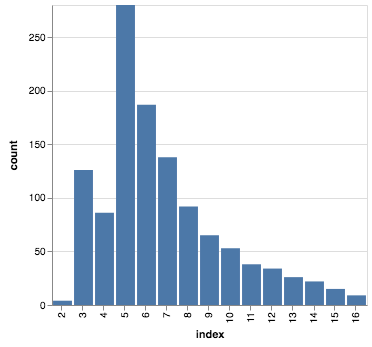

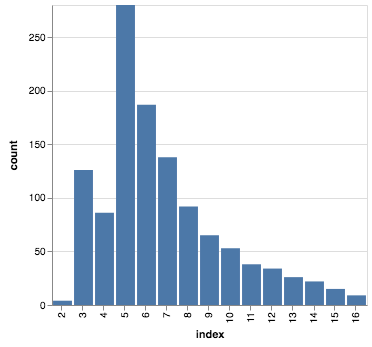

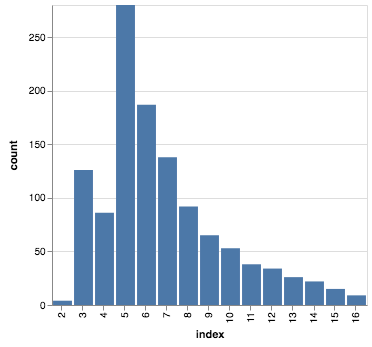

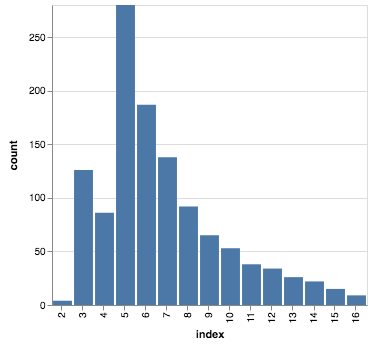

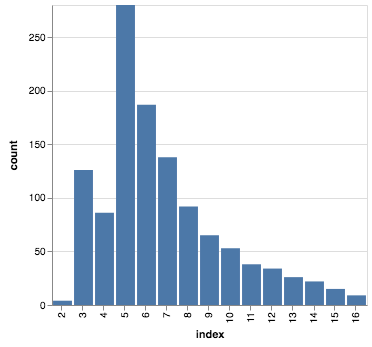

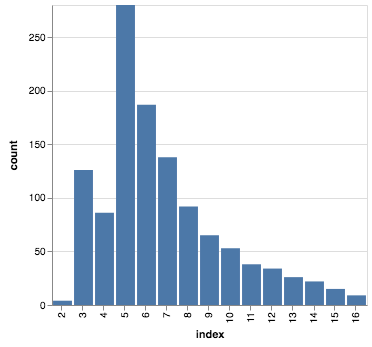

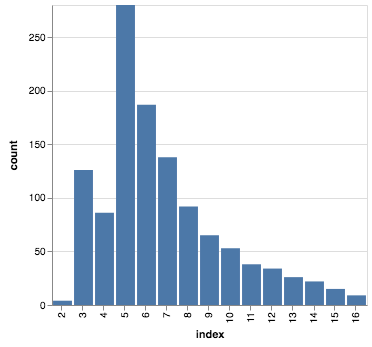

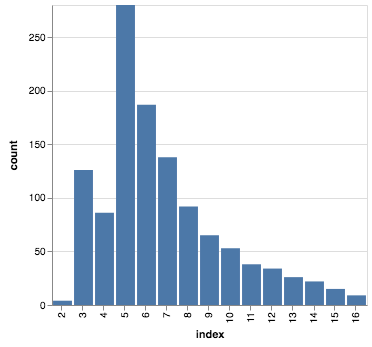

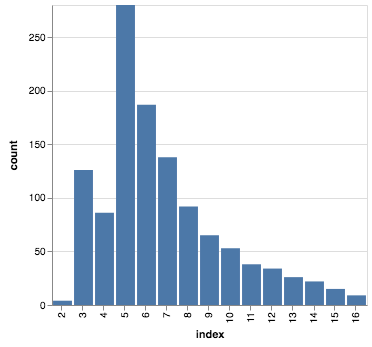

In [12]:
pl.plot_values(df_train[['commentindex', 'sdid']].groupby(['sdid']).agg(['count']).reset_index()['commentindex'], 'count')

### Threads per Article

In [13]:
df.columns

Index(['commentagreement', 'commentid', 'commentindex', 'constructiveclass',
       'guid', 'headline', 'intendedaudience', 'parentid', 'persuasiveness',
       'sd_agreement', 'sd_type', 'sdid', 'sentiment', 'text', 'thumbs-down',
       'thumbs-up', 'timestamp', 'tone', 'topic', 'url'],
      dtype='object')

In [14]:
df['headline'] = df['headline'].apply(clean)

In [15]:
# no empty 
df['headline'].isnull().sum()/len(df)*100

0.0

In [41]:
t_a_lm = df[['headline', 'sdid']].groupby(['headline']).agg(['nunique']).reset_index()['sdid']['nunique'].value_counts().reset_index().rename(columns={'index': 'num_thr', 'nunique': 'count'})

for i in range(1, 100):
    num = t_a_lm[t_a_lm['num_thr'] == i]
    if len(num) == 0:
        t_a_lm = t_a_lm.append({'num_thr': i, 'count': 0}, ignore_index=True)

t_a_lm.sort_values('num_thr', inplace=True)

sumfrom = 15
t_a_lm_o = t_a_lm.head(sumfrom)

t_a_lm_o = t_a_lm_o.append([{"num_thr": str(sumfrom + 1) + '+', 'count': t_a_lm.iloc[sumfrom:].sum()['count']}])
t_a_lm_o.to_csv('threads_per_article_lm.csv', index=None)

In [45]:
t_a_lm = df_train[['headline', 'sdid']].groupby(['headline']).agg(['nunique']).reset_index()['sdid']['nunique'].value_counts().reset_index().rename(columns={'index': 'num_thr', 'nunique': 'count'})

for i in range(1, 100):
    num = t_a_lm[t_a_lm['num_thr'] == i]
    if len(num) == 0:
        t_a_lm = t_a_lm.append({'num_thr': i, 'count': 0}, ignore_index=True)

t_a_lm.sort_values('num_thr', inplace=True)

sumfrom = 15
t_a_lm_o = t_a_lm.head(sumfrom)

t_a_lm_o = t_a_lm_o.append([{"num_thr": str(sumfrom + 1) + '+', 'count': t_a_lm.iloc[sumfrom:].sum()['count']}])
t_a_lm_o.to_csv('threads_per_article_cl.csv', index=None)

In [46]:
t_a_lm_o

,num_thr,count
0,1,349
1,2,102
2,3,45
3,4,19
7,5,5
5,6,8
4,7,9
6,8,6
11,9,2
16,10,0


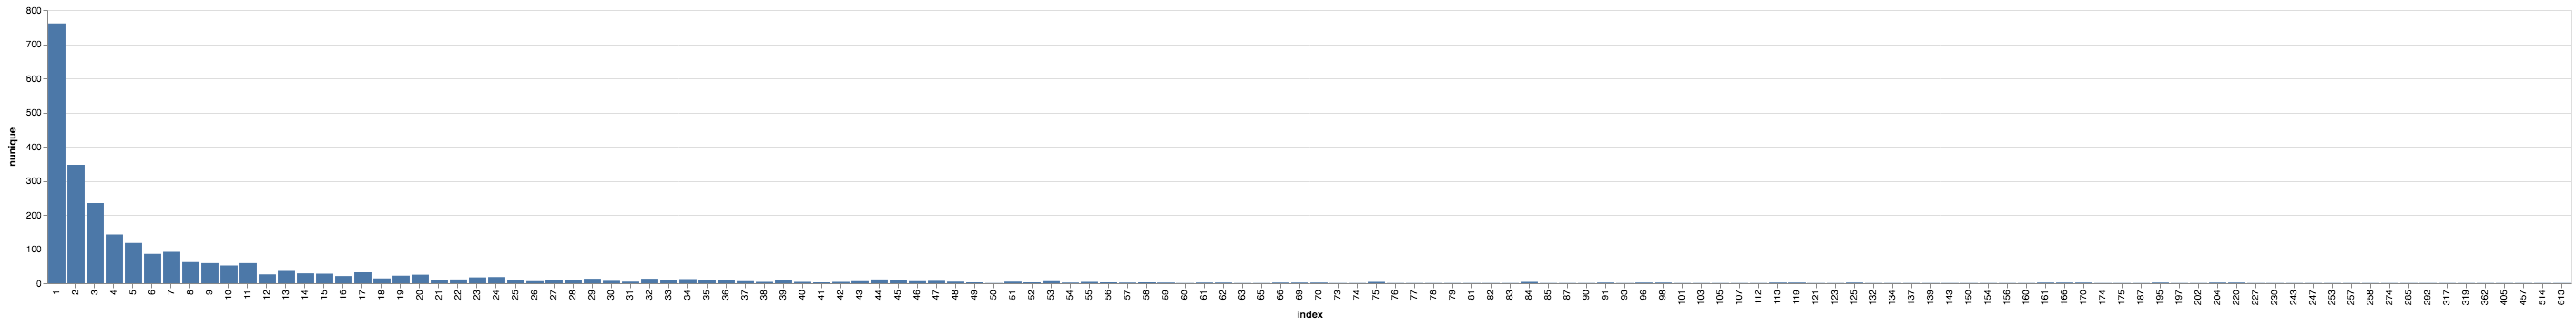

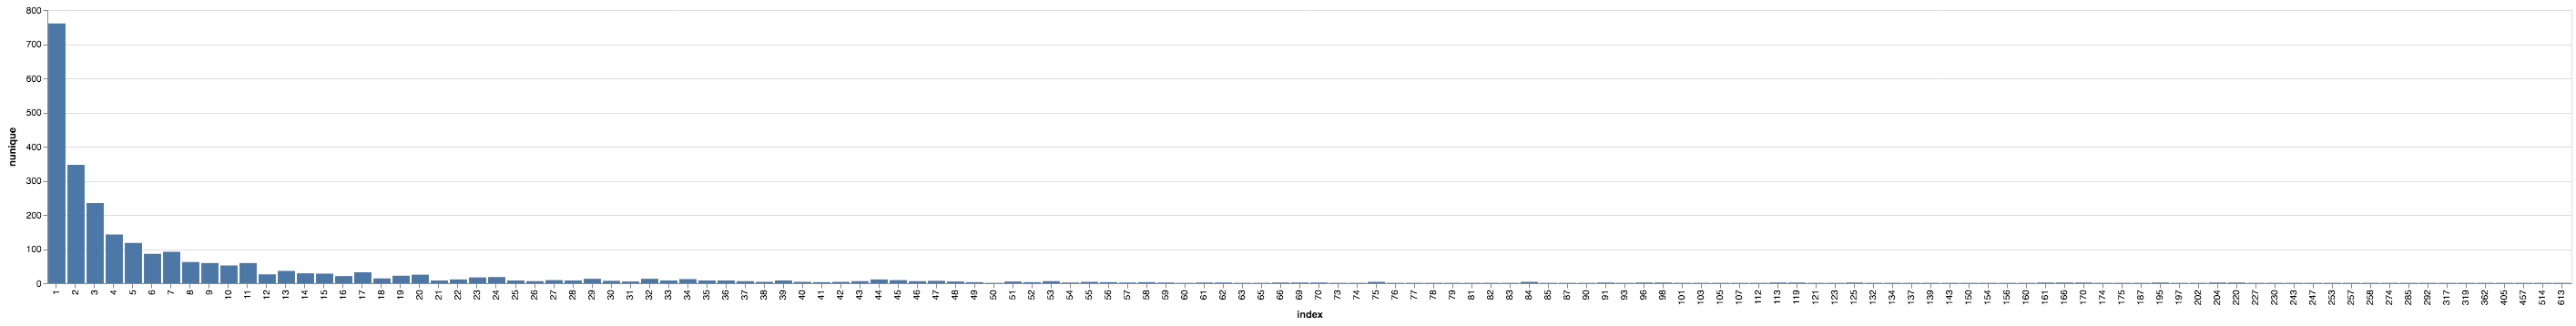

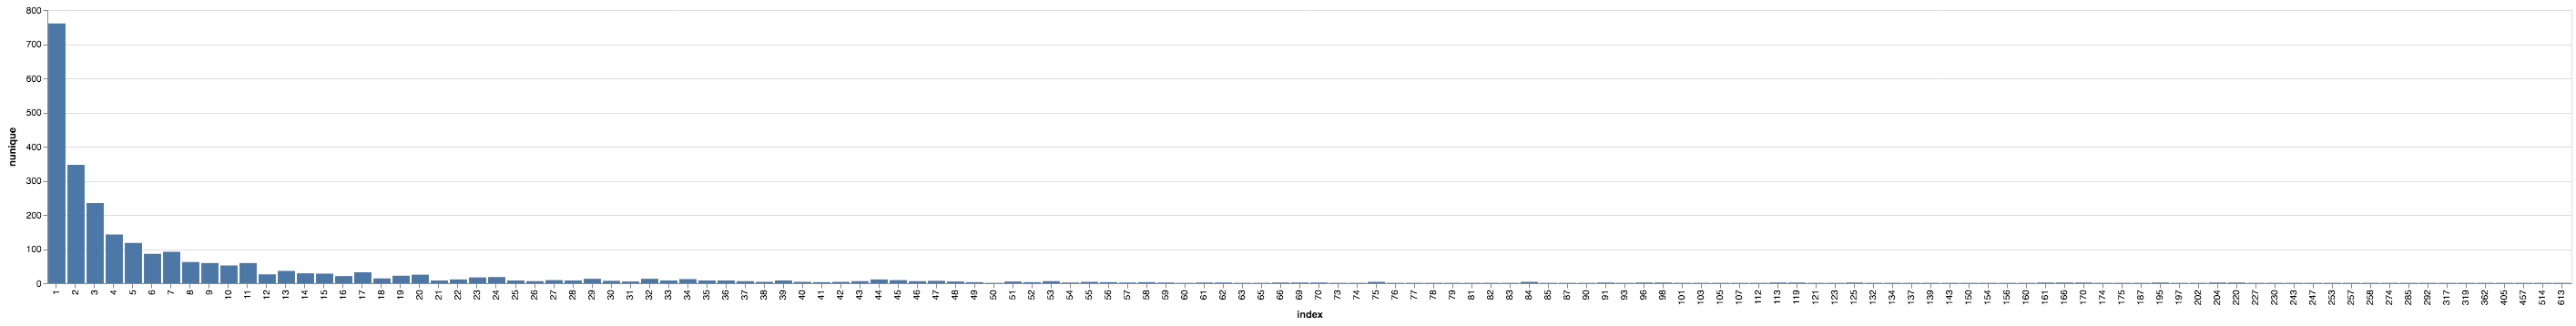

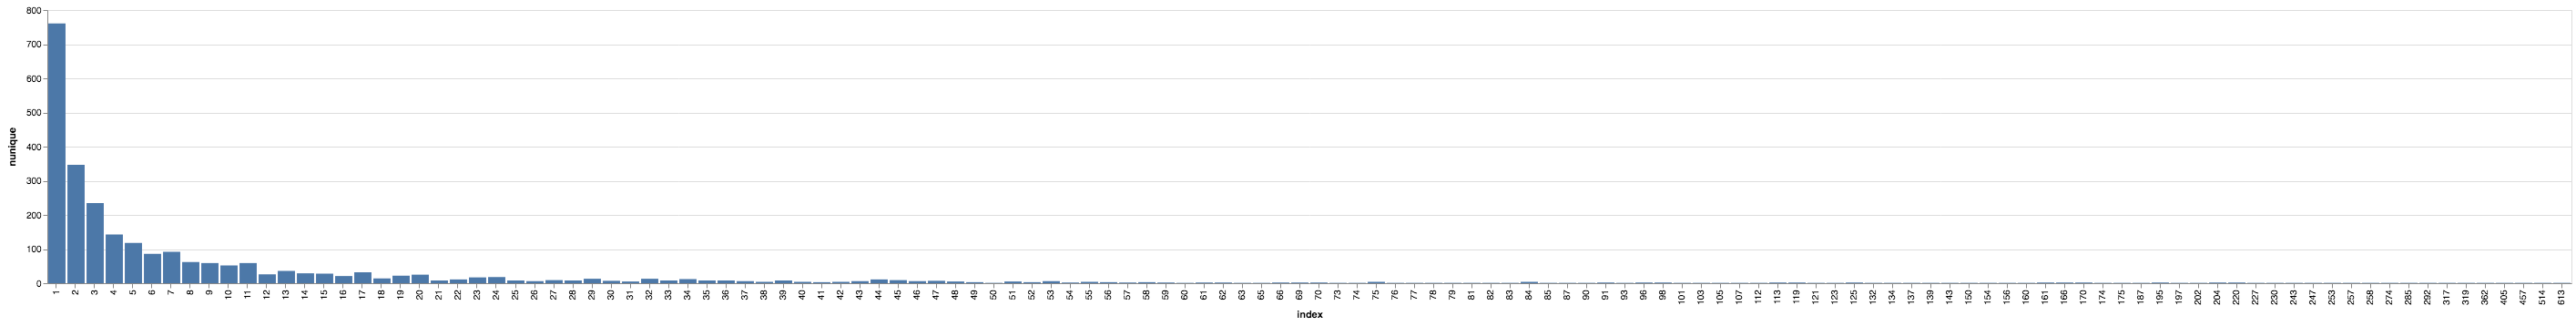

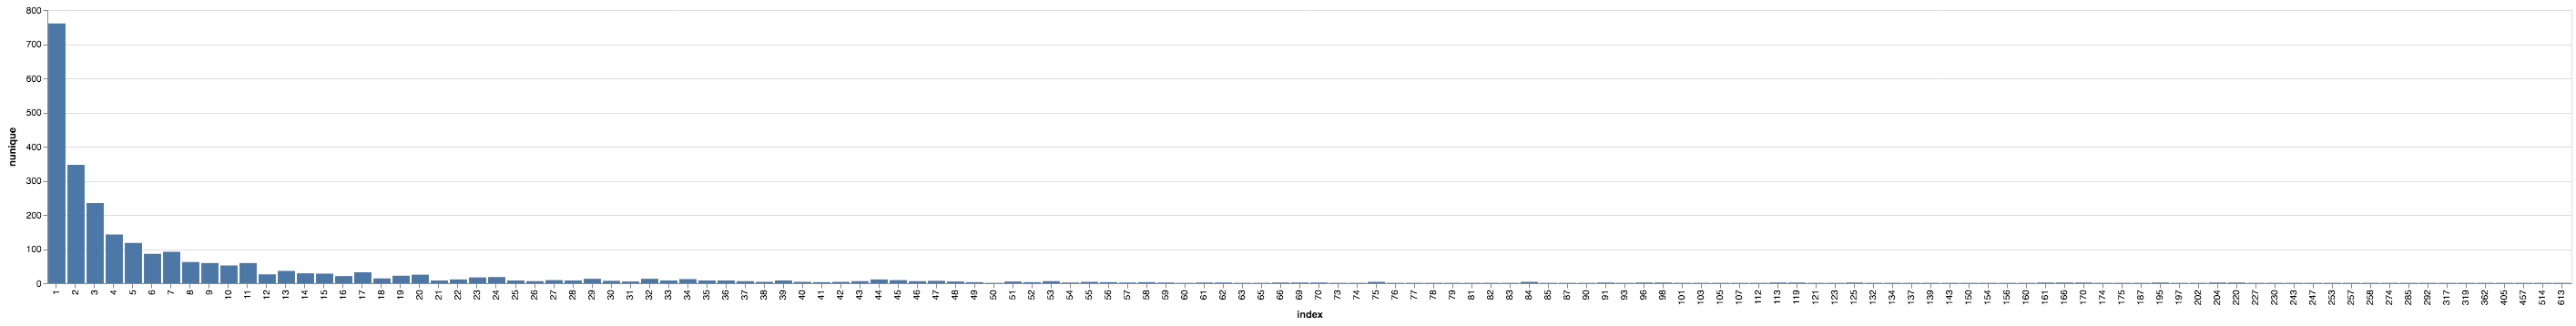

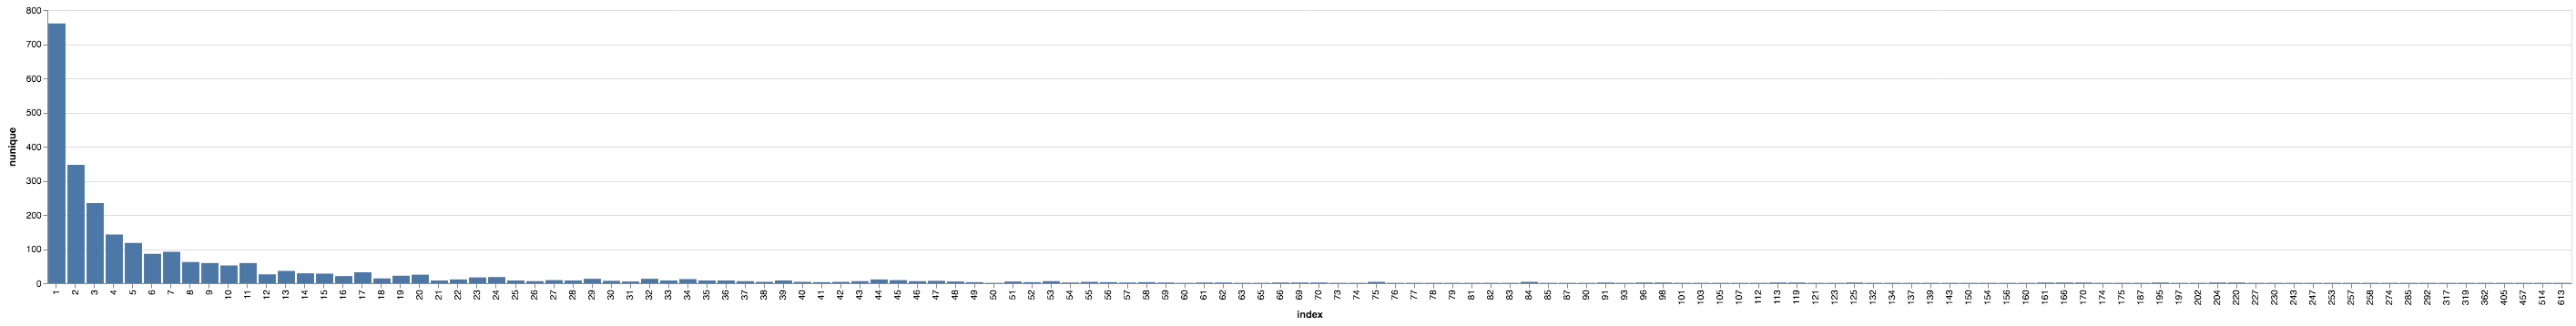

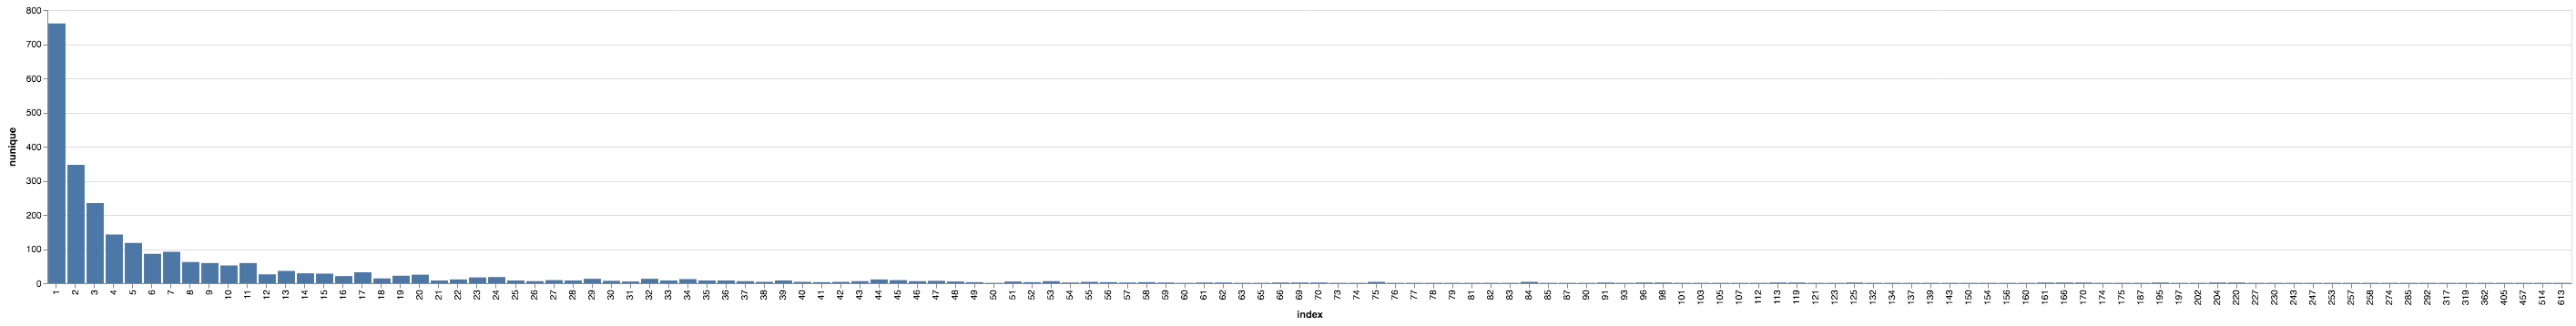

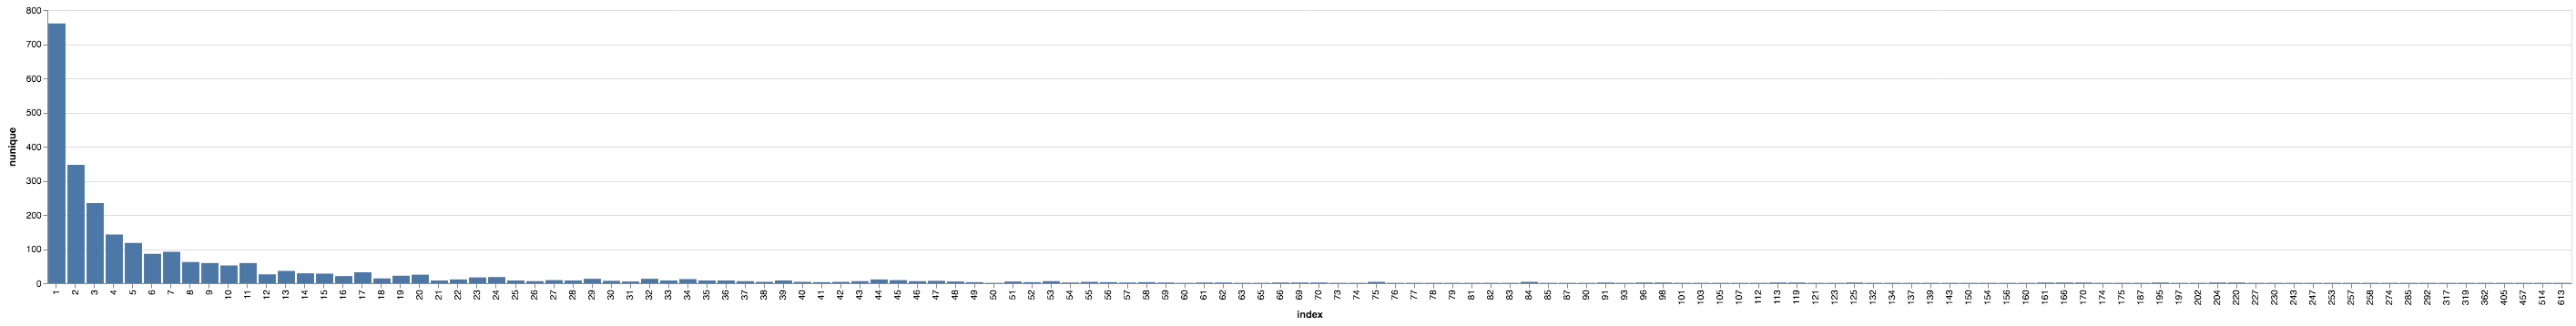

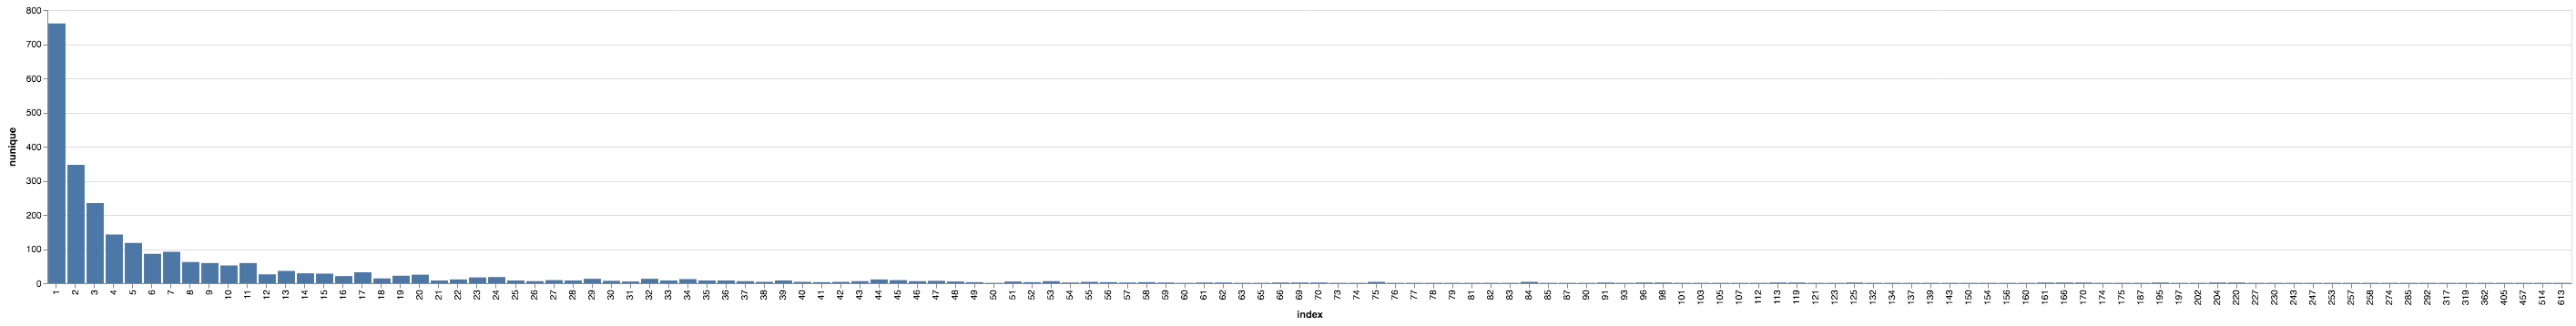

In [16]:
pl.plot_values(df[['headline', 'sdid']].groupby(['headline']).agg(['nunique']).reset_index()['sdid'], 'nunique')

In [17]:
df_train['headline'] = df_train['headline'].apply(clean)

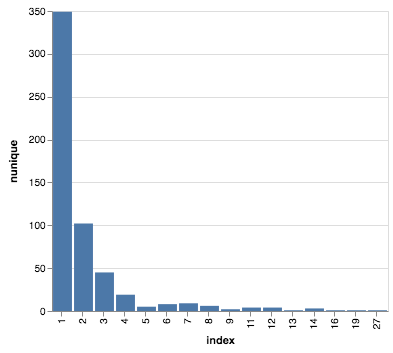

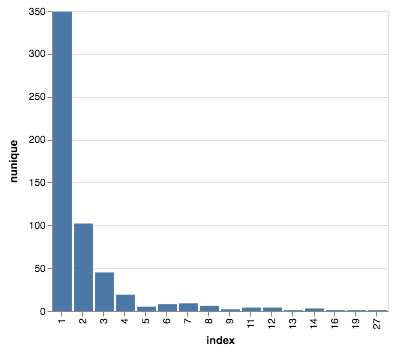

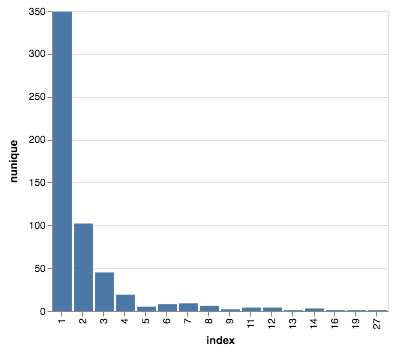

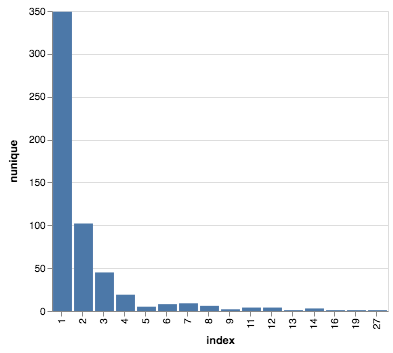

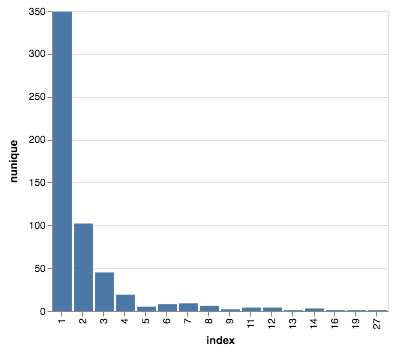

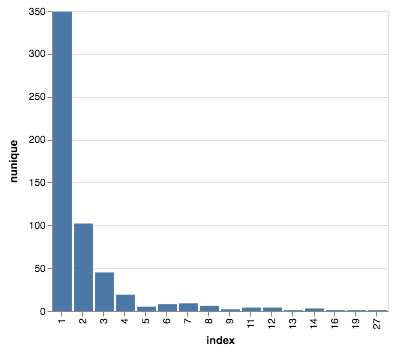

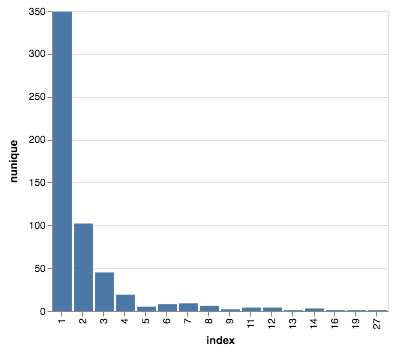

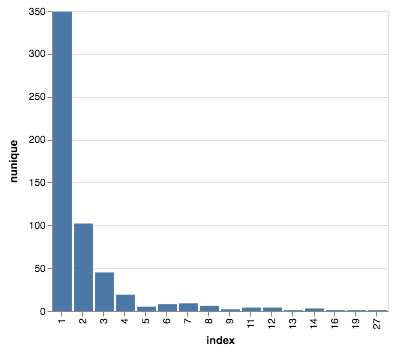

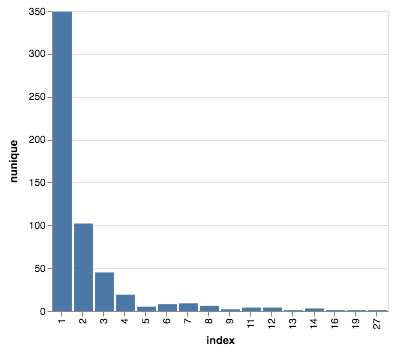

In [18]:
pl.plot_values(df_train[['headline', 'sdid']].groupby(['headline']).agg(['nunique']).reset_index()['sdid'], 'nunique')

In [19]:
df_train[['headline', 'sdid']].groupby(['headline']).agg(['nunique']).reset_index()

,headline,sdid
,,nunique
0,#ripamericanidol: remembering the show's top 4...,3
1,'captain america: civil war' eyes massive $175...,1
2,"'empire's lee daniels says ""sorry"" to sean pen...",1
3,'game of thrones' star: if you're not a femini...,1
4,'gilmore girls' revival: melissa mccarthy sets...,1
5,'godzilla resurgence' japanese trailer: the ki...,1
6,'me and mrs. jones' singer billy paul dead at ...,2
7,'nina' review: controversial biopic is one bum...,1
8,'sometimes the south really is something out o...,1


In [20]:
df_train[df_train['headline'].str.contains("#ripamericanidol: remembering the show's top 40 performances")]

,Unnamed: 0,Unnamed: 0.1,url,article_text,title,publish_date,commentid,clcontroversial,clmean,clinformative,...,sd_agreement,sd_type,sentiment,tone,commentagreement,topic,intendedaudience,persuasiveness,text_proc,cltopic
963,963,963,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00002b000000000000000000000000-e25e5878-09f3-4...,0,1,0,...,Continual disagreement,Argumentative (back and forth),negative,Mean,Adjunct opinion,NaN,Broadcast message / general audience,Not persuasive,I'm guessing Idol started when the writer was ...,1
964,964,964,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00002g000000000000000000000000-ee81acad-36cd-4...,0,0,1,...,Continual disagreement,"Argumentative (back and forth),Off-topic/digre...",mixed,Informative,Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive,Kelly Clarkson's first audition was 'At Last' ...,1
965,965,965,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00002n000000000000000000000000-81781c34-d3f7-4...,0,0,0,...,Agreement throughout,Positive/respectful,positive,NaN,Agreement with commenter,NaN,Reply to a specific commenter,Not persuasive,Totally agree!,1
966,966,966,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00003b000000000000000000000000-040ba81f-125b-4...,0,1,0,...,Continual disagreement,"Argumentative (back and forth),Off-topic/digre...",mixed,Mean,Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive,Since when are people not entitled to their ow...,0
967,967,967,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00003g000000000000000000000000-00729685-0db1-4...,0,0,0,...,Agreement throughout,Positive/respectful,positive,NaN,Agreement with commenter,NaN,Reply to a specific commenter,Not persuasive,Totally agree with David Archuleta's Imagine -...,1
968,968,968,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00003n000000000000000000000000-eddeb202-4698-4...,0,0,0,...,Continual disagreement,Argumentative (back and forth),negative,Informative,Disagreement with commenter,NaN,Reply to a specific commenter,Not persuasive,So she's not entitled to her own opinion since...,1
969,969,969,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00004b000000000000000000000000-1c5fbc21-e21d-4...,0,1,0,...,Continual disagreement,"Argumentative (back and forth),Off-topic/digre...",mixed,Mean,Disagreement with commenter,"Off-topic with conversation,Off-topic with art...",Reply to a specific commenter,Not persuasive,"You're a real broken record, aren't you Slynnc...",0
970,970,970,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAmericanIdol: Remembering the Show's Top 4...,2016-04-03 23:18:54+00:00,00004b000000000000000000000000-fe50607a-c0ba-4...,0,1,0,...,Continual disagreement,Argumentative (back and forth),negative,Mean,Disagreement with commenter,NaN,Reply to a specific commenter,Not persuasive,Um...that's not at all what we're saying. It's...,1
971,971,971,https://www.yahoo.com/music/ripamericanidol-re...,"By now, you’ve surely heard the soul-shatterin...",#RIPAme

### Comments per Article

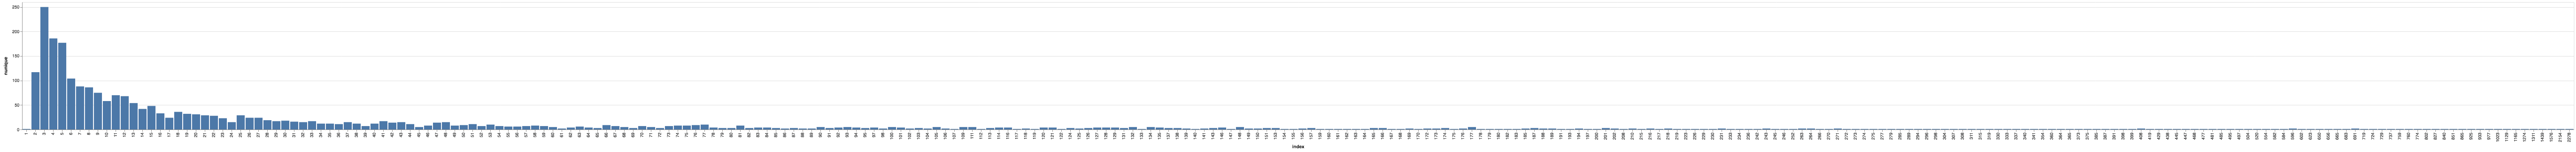

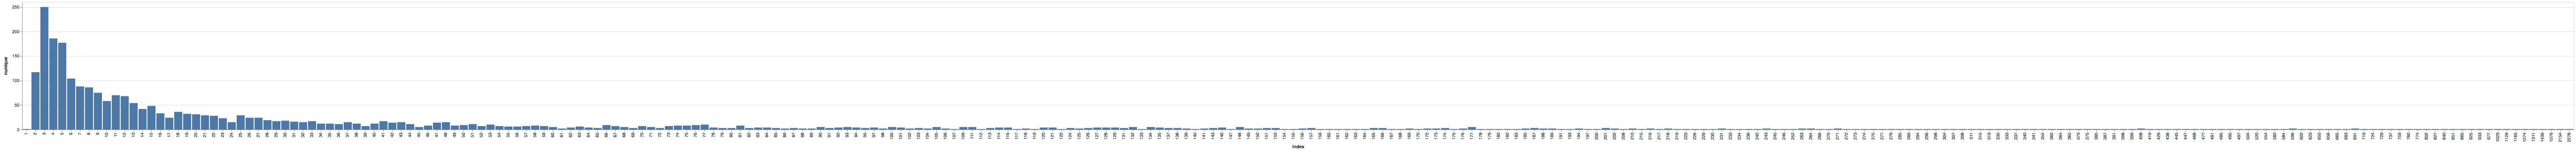

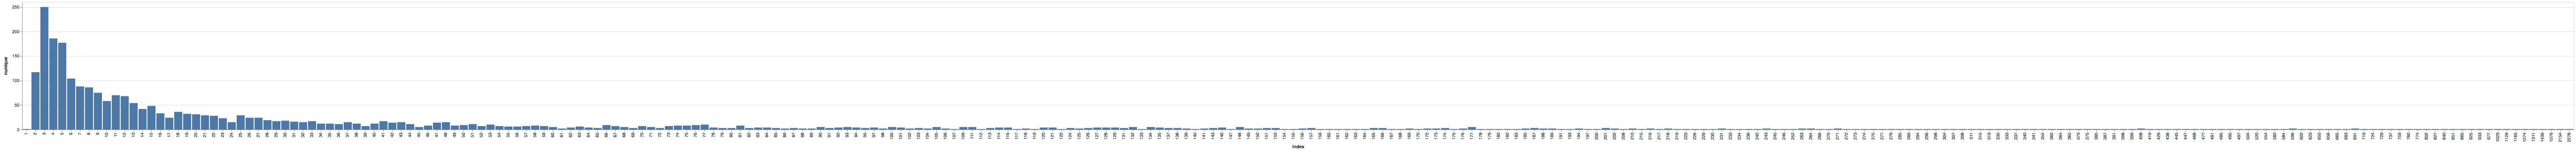

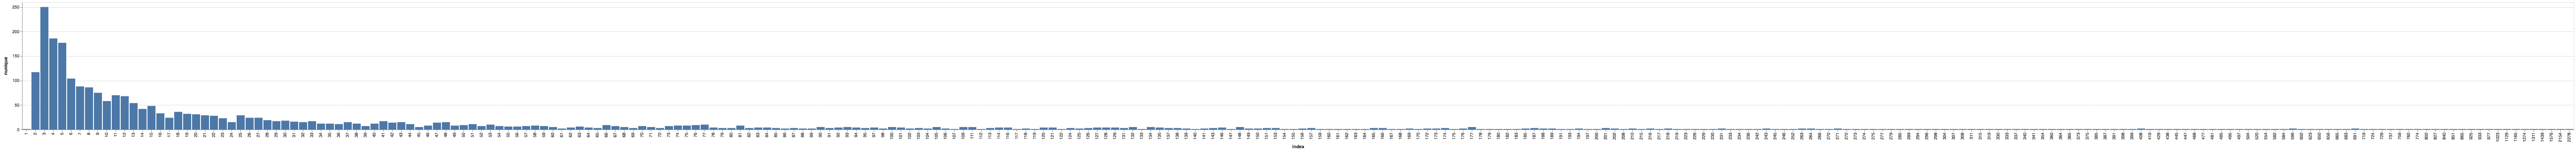

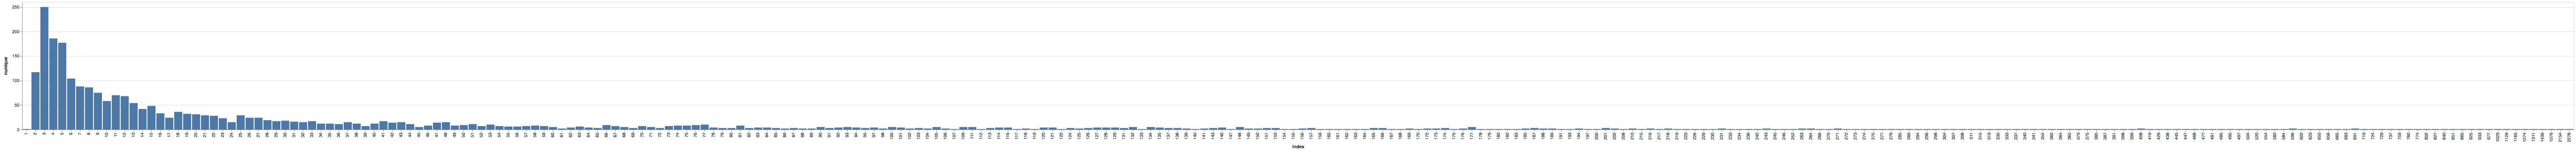

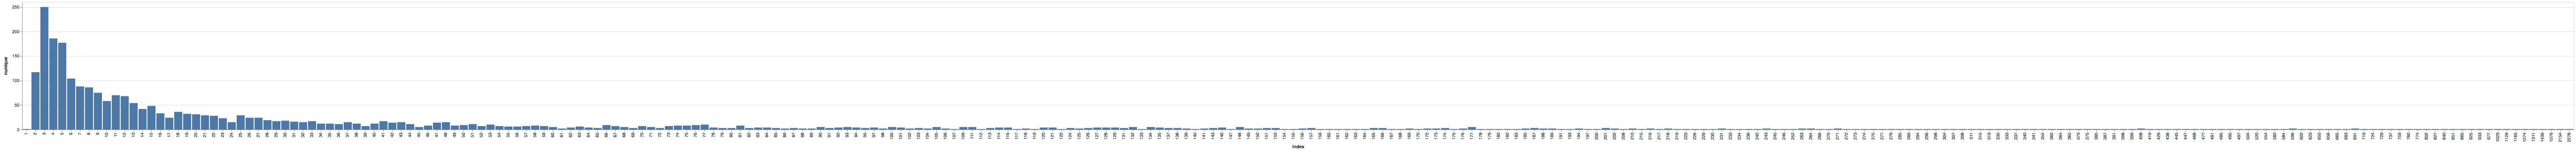

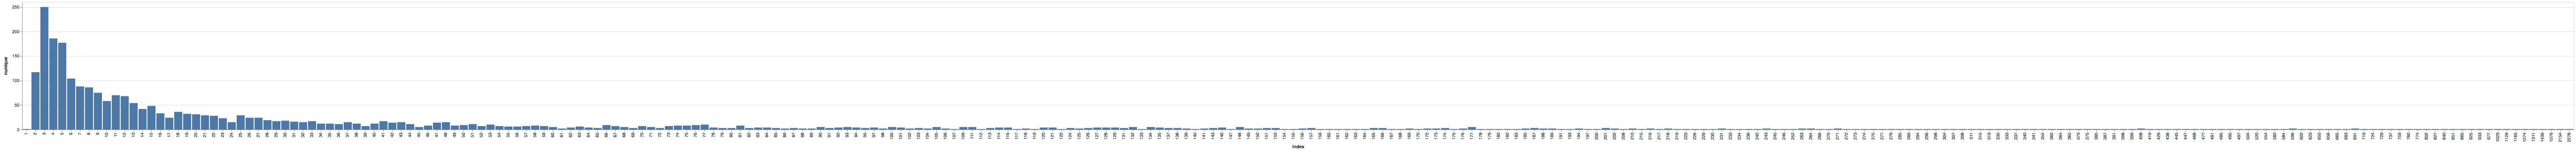

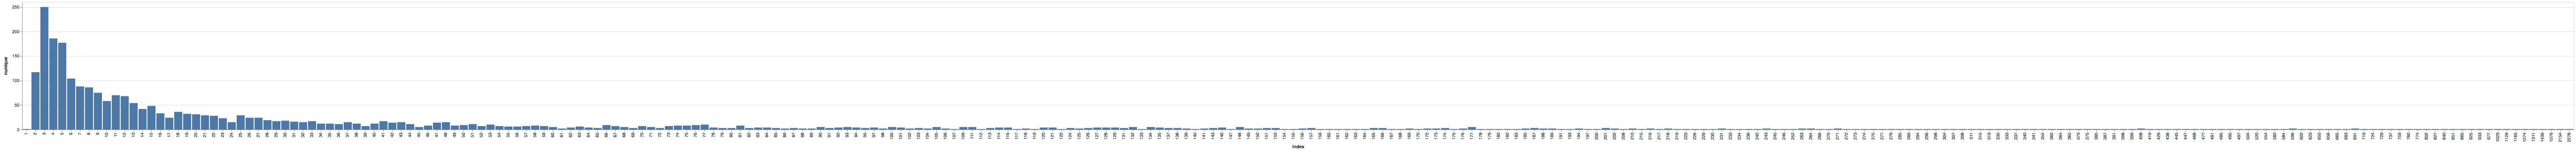

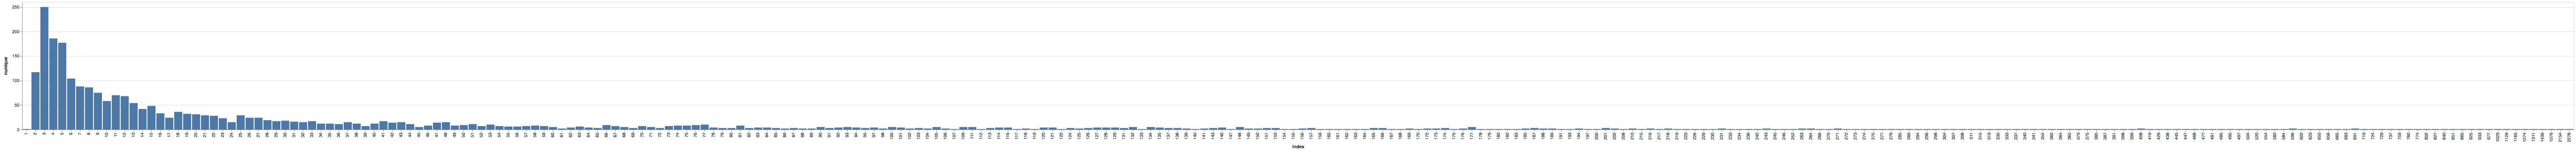

In [21]:
pl.plot_values(df[['headline', 'guid']].groupby(['headline']).agg(['nunique']).reset_index()['guid'], 'nunique')

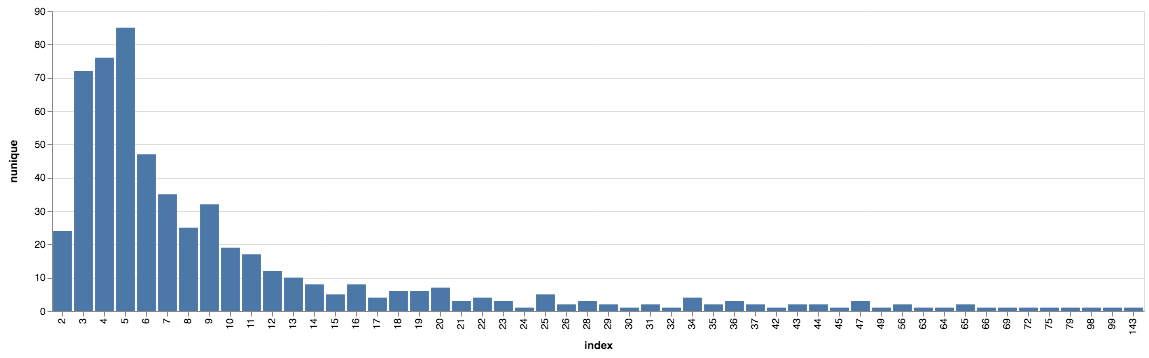

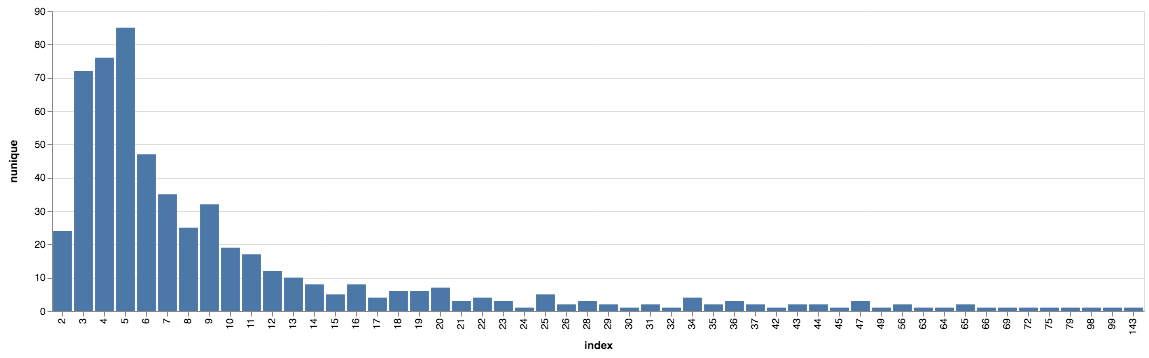

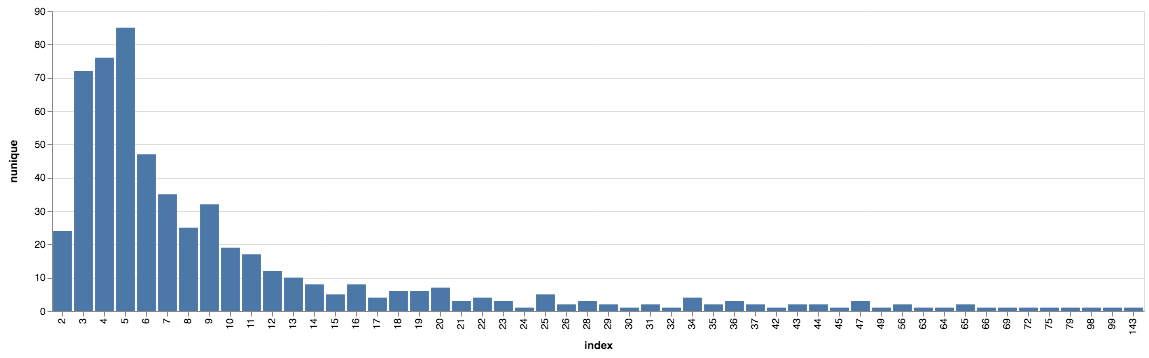

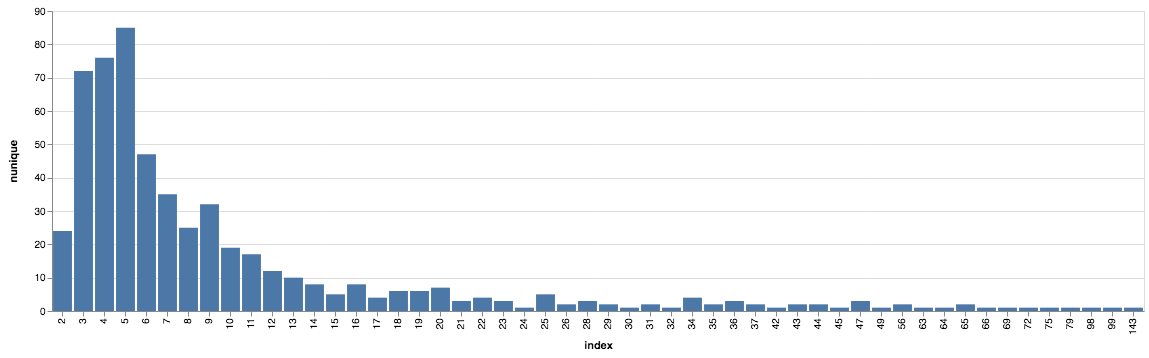

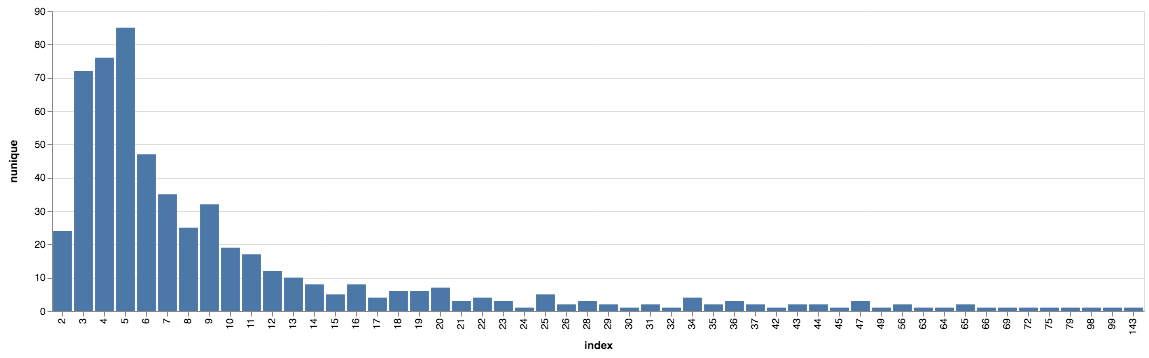

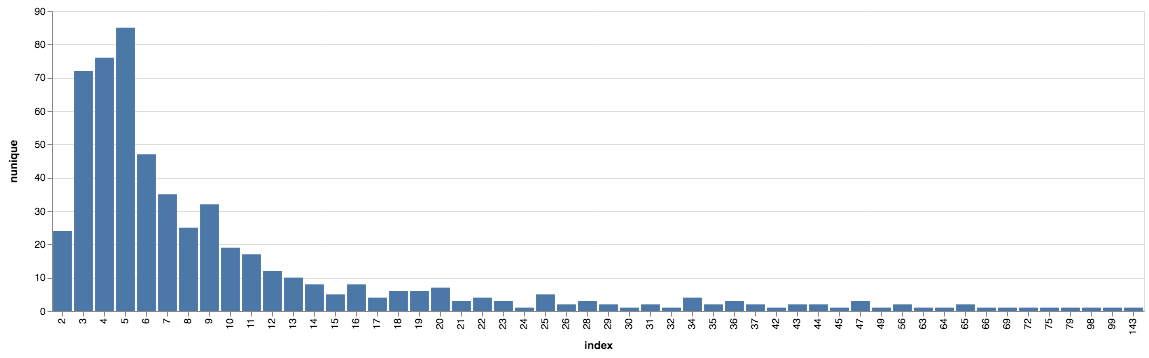

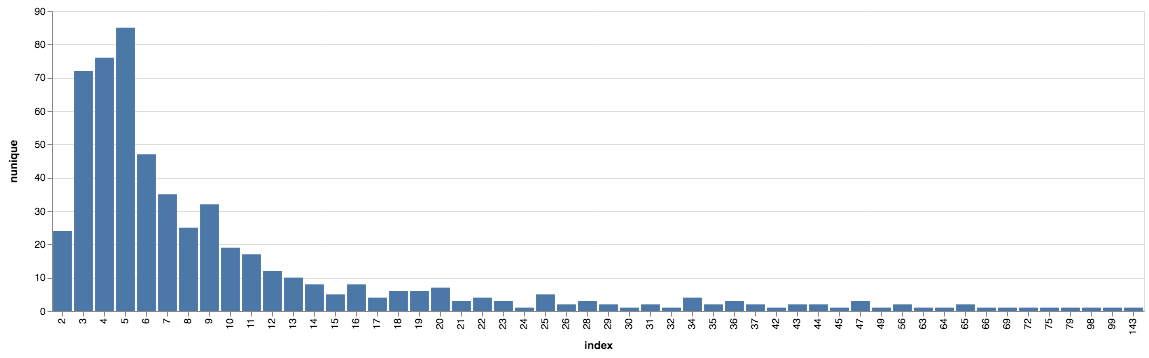

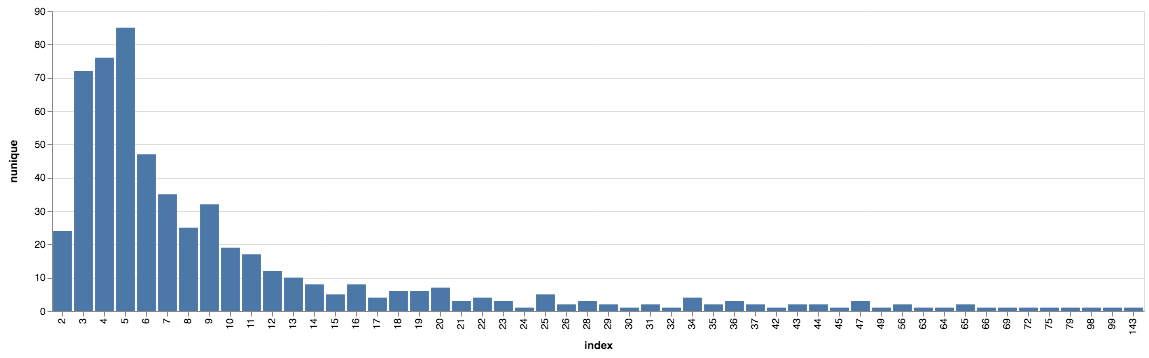

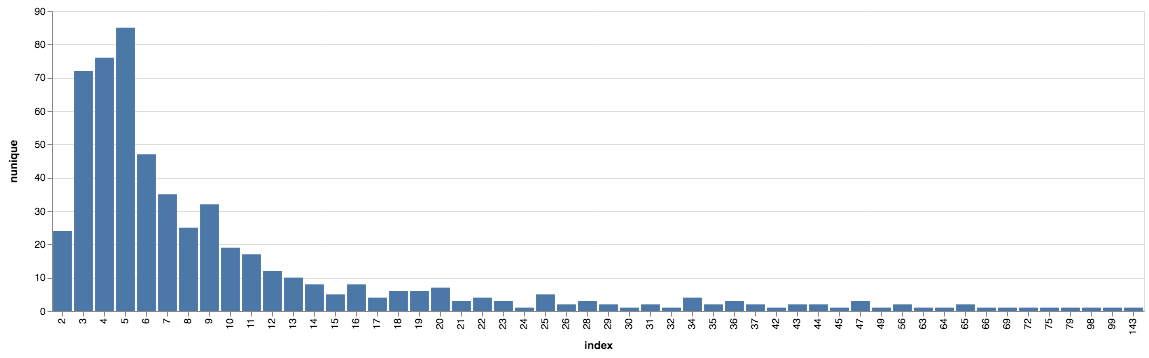

In [22]:
pl.plot_values(df_train[['headline', 'guid']].groupby(['headline']).agg(['nunique']).reset_index()['guid'], 'nunique')

### Comment Length


In [12]:
df['com_len'] = df['text'].str.len()

In [13]:
tok = spacy.blank('en')

In [14]:
df['tokens'] = df['text'].swifter.apply(lambda x: tok.tokenizer(clean(x, lower=False, zero_digits=True, no_urls=True, no_emails=True)))

Pandas Apply: 100%|██████████| 238512/238512 [06:51<00:00, 579.46it/s]


In [15]:
df['num_tokens'] = df['tokens'].swifter.apply(len)

Pandas Apply: 100%|██████████| 238512/238512 [00:00<00:00, 390161.42it/s]


In [16]:
num_data = pd.DataFrame(df['num_tokens'].value_counts())

In [17]:
num_data

,num_tokens
12,5729
10,5686
11,5574
13,5477
9,5451
14,5374
15,5241
8,5133
16,4976
7,4883


In [18]:
num_data = num_data.reset_index()

In [19]:
num_data.rename(columns={'index': 'length', 'num_tokens': 'count'}).to_csv('comment_length.csv', index=None)

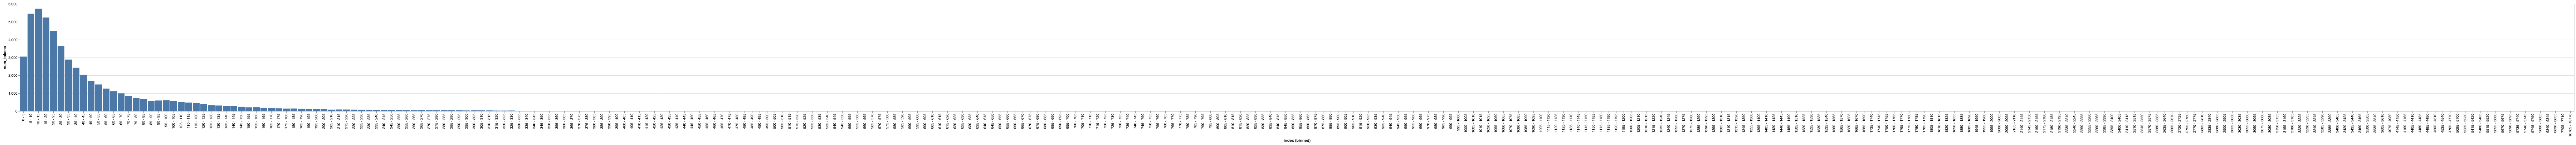

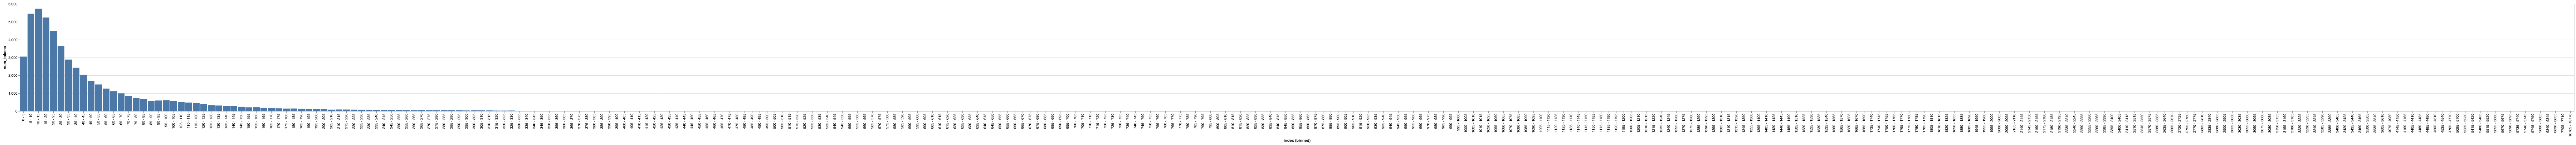

In [20]:
alt.Chart(num_data).mark_bar().encode(
    alt.X("index:N", bin=alt.BinParams(maxbins=5000)),
    y='num_tokens:Q',
)

In [21]:
(df['num_tokens'] <= 200).sum() / len(df)

0.9676578117662843

In [22]:
df['num_tokens'].mean()

52.927504695780506

In [23]:
df['num_tokens'].median()

29.0

In [24]:
df['num_tokens'].max()

10769

In [25]:
df['num_tokens'].min()

0

In [26]:
df['num_tokens'].quantile([0.0, .97])

0.00      0.0
0.97    207.0
Name: num_tokens, dtype: float64

In [27]:
df['num_tokens'].quantile([0.0, .99])

0.00      0.00
0.99    322.89
Name: num_tokens, dtype: float64

In [28]:
df[df['num_tokens'] > 2000]['text'].tolist()

['This is just an example of how reporers hide behind confidential infornmants and are not herld either responsible or accoutable for their actions.  But since the article is based on Hillary then I wonder why the author did not address the following which clearly demonstrates Hillay\'s character: When Bill Clinton was president, he allowed Hillary to assume authority over a health care reform.  Even after threats and intimidation, she couldnâ\x80\x99t even get a vote in a democratic controlled congress.  This fiasco cost the American taxpayers about $13 million in cost for studies, promotion, and other efforts. Then President Clinton gave Hillary authority over selecting a female attorney general.  Her first two selections were Zoe Baird and Kimba Wood â\x80\x93 both were forced to withdraw their names from consideration. Next she chose Janet Reno â\x80\x93 husband Bill described her selection as â\x80\x9cmy worst mistake.â\x80\x9d  Some may not remember that Reno made the decision to

### Max Vocab

In [30]:
df.to_pickle('df_tmp.pkl')

In [5]:
df = pd.read_pickle('df_tmp.pkl')

In [23]:
from collections import Counter
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
nlp = spacy.blank('en')

In [7]:
cnt = Counter()

In [8]:
for x in df['tokens']:
    cnt.update([str(xx) for xx in x])

In [31]:
res = []
for x in cnt.most_common(500):
    if x[0] in stopWords or len(x[0]) <= 3:
        continue
    doc = nlp(x[0])
#     for token in doc:
#         print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#               token.shape_, token.is_alpha, token.is_stop)
#     print(x[0], x[1])
    res.append({'token': x[0].upper(), 'count': x[1]})

In [34]:
pd.DataFrame(res[:30]).to_csv('word_freq.csv', index=False)

In [40]:
for max_vocab in range(10000, 60100, 100):
    print(max_vocab, sum([x[1] for x in cnt.most_common(max_vocab)]) / df['num_tokens'].sum())
#     print(max_vocab)

10000 0.9488197138035203
10100 0.9492529415562374
10200 0.9496796736651947
10300 0.9500995140545531
10400 0.9505121458636414
10500 0.9509190741806478
10600 0.9513199029297333
10700 0.9517155034777439
10800 0.952103657799981
10900 0.9524866631363107
11000 0.9528643610563976
11100 0.9532366723450739
11200 0.953603042496165
11300 0.953963788370342
11400 0.9543202566254576
11500 0.9546694370851353
11600 0.9550156073684365
11700 0.9553562325899914
11800 0.9556921049014782
11900 0.9560248086062527
12000 0.956351571173442
12100 0.9566761157159328
12200 0.9569929763871468
12300 0.9573089656915148
12400 0.9576179048459483
12500 0.9579251012666902
12600 0.9582261189043433
12700 0.958524918517298
12800 0.9588180146381708
12900 0.959108179797835
13000 0.9593933544019274
13100 0.9596779744998454
13200 0.9599552275871575
13300 0.9602324806744696
13400 0.9605049016365458
13500 0.9607742332070776
13600 0.9610410298922396
13700 0.9613024399459911
13800 0.9615638499997425
13900 0.9618197942069155
14000 

43100 0.9887990544877571
43200 0.9888307405548785
43300 0.9888624266219999
43400 0.9888941126891213
43500 0.9889257987562426
43600 0.988957484823364
43700 0.9889891708904854
43800 0.9890208569576068
43900 0.9890525430247282
44000 0.9890842290918496
44100 0.989115915158971
44200 0.9891476012260924
44300 0.9891792872932138
44400 0.9892109733603351
44500 0.9892426594274565
44600 0.9892743454945779
44700 0.9893060315616993
44800 0.9893377176288207
44900 0.9893694036959421
45000 0.9894010897630635
45100 0.9894327758301849
45200 0.9894644618973063
45300 0.9894961479644276
45400 0.989527834031549
45500 0.9895595200986704
45600 0.9895912061657918
45700 0.9896228922329132
45800 0.9896545783000346
45900 0.989686264367156
46000 0.9897179504342773
46100 0.9897496365013987
46200 0.9897813225685201
46300 0.9898130086356415
46400 0.9898446947027629
46500 0.9898763807698843
46600 0.9899080668370057
46700 0.9899397529041271
46800 0.9899714389712485
46900 0.9900031250383698
47000 0.9900348111054912
4710

In [147]:
df['num_tokens'].sum()

12624063

In [14]:
df['commentindex'].value_counts()

0     36713
1     36711
2     36639
3     31936
4     29170
5     19905
6     13989
7      9986
8      7368
9      5482
10     3890
11     2757
12     1848
13     1157
14      672
15      286
16        3
Name: commentindex, dtype: int64

In [18]:
df[df['commentindex'] > 20]

,commentagreement,commentid,commentindex,constructiveclass,guid,headline,intendedaudience,parentid,persuasiveness,sd_agreement,sd_type,sdid,sentiment,text,thumbs-down,thumbs-up,timestamp,tone,topic,url


In [143]:
num_com_index = df_train['commentindex'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index' : 'rank', 'commentindex': 'count'})

In [144]:
num_com_index.to_csv('rank_com_index_cl.csv', index=None)

In [145]:
num_com_index = df['commentindex'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index' : 'rank', 'commentindex': 'count'})

In [146]:
num_com_index.to_csv('rank_com_index_lm.csv', index=None)